# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [66]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [67]:
import sklearn
sklearn.__version__

'0.21.3'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [68]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

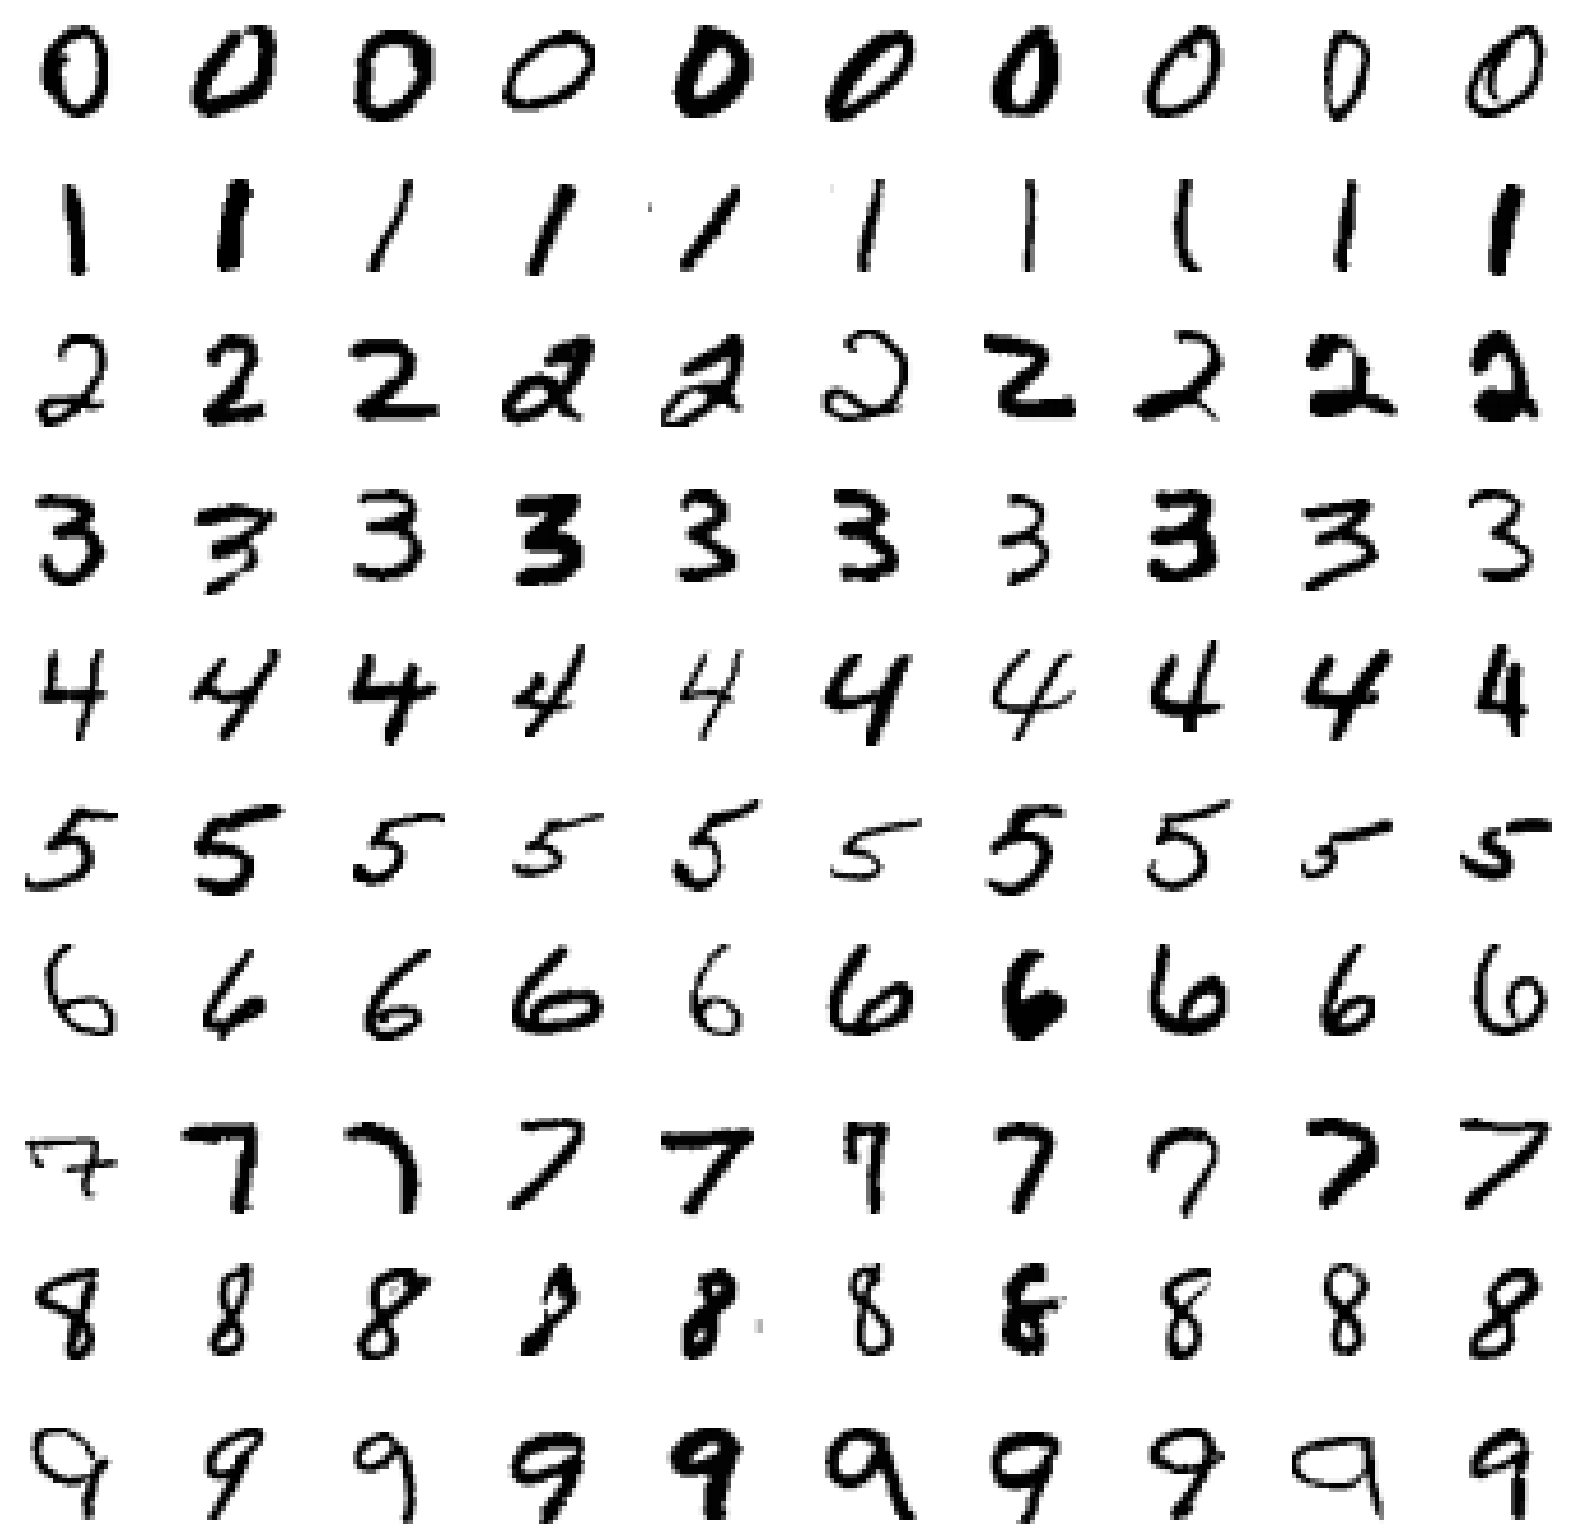

In [69]:
def plot_arr(an_axis, data_arr):
    an_axis.set_axis_off()
    # need to change the 28*28 long vector into a 28x28 matrix
    np_mat = np.reshape(data_arr, (28, 28))
    # plot matrix using a scale of 0 to 1 ranging from white to black 
    an_axis.imshow(np_mat, cmap='binary_r', vmin=0., vmax=1.)

    
def P1(num_examples=10):
    fig, ax = plt.subplots(nrows=10, ncols=num_examples, figsize=(28, 28))
    for digit in range(10):
        # extract the rows having label equal to digit, then take the first num_examples of these
        # (need to reverse the 0 to 1 scale to get black on white instead of white on black)
        examples = 1 - train_data[train_labels == str(digit)][:num_examples]
        for i in range(num_examples):
            plot_arr(ax[digit][i], examples[i])
    
    
P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [70]:
def train_test_model(train_data, train_labels, test_data, test_labels, k = 1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    if (k == 1):
        print('k=1 results')
        print(classification_report(test_labels, predicted_labels))
    else:
        wrong_prediction = (predicted_labels != test_labels)
        num_incorrect = np.sum(wrong_prediction)
        print(f'k={k} number of incorrect predictions: {num_incorrect}/{len(predicted_labels)}')
        print(f'k={k} percent correct: {100*(1-num_incorrect/len(predicted_labels)):.1f}%')
        print()
        
        
def P2(k_values):
    for k_val in k_values:
        train_test_model(mini_train_data, mini_train_labels, dev_data, dev_labels, k = k_val)

        
k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1 results
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3 number of incorrect predictions: 124/1000
k=3 percent correct: 87.6%

k=5 number of incorrect predictions: 118/1000
k=5 percent correct: 88.2%

k=7 number of incorrect predictions: 123/1000
k=7 percent correct: 87.7%

k=9 num

ANSWER: For k=1, the digit with the lowest F1 score is 8, so I would say 8 was the hardest to recognize.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [71]:
def train_test_model2(train_data, train_labels, test_data, test_labels):
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(train_data, train_labels)
    time_before = time.time()
    predicted_labels = model.predict(test_data)
    wrong_prediction = (predicted_labels != test_labels)
    num_incorrect = np.sum(wrong_prediction)
    time_after = time.time()
    print(f'training size: {len(train_data)}')
    print(f'elapsed time: {(time_after - time_before):.3f} sec.')
    accuracy = 100*(1-num_incorrect/len(predicted_labels))
    print(f'percent correct: {accuracy:.1f}%')
    print()
    return accuracy

def P3(train_sizes, accuracies):
    for train_size in train_sizes:
        accuracies.append(
            train_test_model2(train_data[:train_size], train_labels[:train_size], dev_data, dev_labels))

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []

P3(train_sizes, accuracies)

training size: 100
elapsed time: 0.113 sec.
percent correct: 70.2%

training size: 200
elapsed time: 0.207 sec.
percent correct: 79.1%

training size: 400
elapsed time: 0.388 sec.
percent correct: 81.1%

training size: 800
elapsed time: 0.760 sec.
percent correct: 86.6%

training size: 1600
elapsed time: 1.549 sec.
percent correct: 90.5%

training size: 3200
elapsed time: 3.068 sec.
percent correct: 92.7%

training size: 6400
elapsed time: 6.135 sec.
percent correct: 93.9%

training size: 12800
elapsed time: 12.249 sec.
percent correct: 95.2%

training size: 25600
elapsed time: 25.068 sec.
percent correct: 96.3%



### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Model 0: raw data
R**2 = 0.4177006634161018
The predictions are 123.6, 163.7, and 752.2.

Model 1: transformed data
R**2 = 0.8649045423180001
The predictions (transformed) are 58.9, 111.5, and 884.3.
The predictions (untransformed) are 98.3, 99.1, and 99.9.


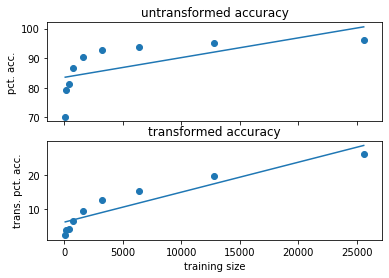

In [82]:
def odds(y):
    return y/(100-y)

def odds_inv(x):
    return 100*x/(x+1)

def P4():
    X = np.array(train_sizes).reshape(-1, 1) # make it a single column matrix
    y = np.array(accuracies)
    model0 = LinearRegression().fit(X, y)
    print('Model 0: raw data')
    print(f'R**2 = {model0.score(X,y)}')
    yfit = model0.predict(X)
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].scatter(X, y)
    ax[0].plot(X, yfit)
    ax[0].set_title('untransformed accuracy')
    ax[0].set_ylabel('pct. acc.')
    # will use the model to predict values for these sizes (need a column vector):
    x = np.array([60000, 120000, 1000000]).reshape(-1, 1) 
    pred = model0.predict(x)
    print(f'The predictions are {pred[0]:.1f}, {pred[1]:.1f}, and {pred[2]:.1f}.')
    y_trns = odds(y) # transform y
    model1 = LinearRegression().fit(X, y_trns)
    print()
    print('Model 1: transformed data')
    print(f'R**2 = {model1.score(X, y_trns)}')
    y_trns_fit = model1.predict(X)
    ax[1].scatter(X, y_trns)
    ax[1].plot(X, y_trns_fit)
    ax[1].set_title('transformed accuracy')
    ax[1].set_xlabel('training size')
    ax[1].set_ylabel('trans. pct. acc.')
    pred = model1.predict(x)
    print(f'The predictions (transformed) are {pred[0]:.1f}, {pred[1]:.1f}, and {pred[2]:.1f}.')
    pred_untrns = odds_inv(pred)
    print(f'The predictions (untransformed) are {pred_untrns[0]:.1f}, {pred_untrns[1]:.1f}, and {pred_untrns[2]:.1f}.')
    
P4()

ANSWER: The problem with using linear regression on the untransformed data is that the relationship is obviously non-linear. The y values seem to be increasing towards a horizontal asymptote that is no greater than 100% whereas linear models grow unboundedly.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

percent correct: 88.4%
The largest number of errors was 11 and it occurred for digits 4 and 9.
Images known to be of a 4 but predicted to be a 9:


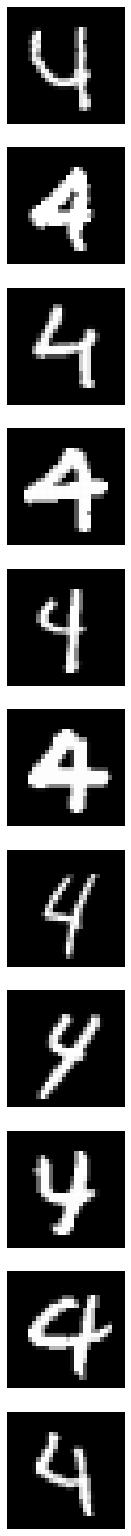

In [73]:
def P5():
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)
    C = confusion_matrix(dev_labels, predicted_labels)
    num_correct = np.trace(C) # the counts on the diagonal represent the ones it got right
    accuracy = 100 * num_correct/len(predicted_labels)
    print(f'percent correct: {accuracy:.1f}%')
    I = np.identity(C.shape[0], dtype=bool)
    # we are going to look at the values off the diagonal
    am = C[np.logical_not(I)].argmax()
    # when we took out the diagonal, we were left with data from 9 rows and 9 columns in a vector
    rm = am // 9 # the row where the max occurred
    cm = 1 + am % 9 # the column where the max occurred
    print(f'The largest number of errors was {C[rm][cm]} and it occurred for digits {rm} and {cm}.')
    print(f'Images known to be of a {rm} but predicted to be a {cm}:')
    misclassified_imgs = dev_data[(predicted_labels == str(cm)) & (dev_labels == str(rm))]
    fig, ax = plt.subplots(len(misclassified_imgs), figsize=(28,28))
    for axis, img in zip(ax, misclassified_imgs):
        plot_arr(axis, img)

        
P5()

ANSWER: See above.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

_Justification of blurring filter using a Gaussian function._
The 8 points surrounding a point are either distance 1 or distance $\sqrt2$ from the point. We want to find a coefficient for each distance to put into the formula 
$$ w(P) = (w_{\sqrt2} \cdot v_0 + w_{1} \cdot v_1 + w_{\sqrt2} \cdot v_2 + w_1 \cdot v_3 + v_4 + w_1 \cdot v_5 + w_{\sqrt2} \cdot v_6 + w_1 \cdot v_7 + w_{\sqrt2} \cdot v_8) / 9 $$
where $v_0, v_1, ..., v_8$ are the values of the 9 points in the square surrounding $P$, having value $v_4$.
The Gaussian function $g(d)$ of the distance $d$ from a center point $P$ used to weight the contribution of a point $Q$ can have $g(0)=1$. So $g(d) = e^{-cd^2}$. This gives $g(1) = e^{-c}$ and $g(\sqrt2) = e^{-2c}$. 
Letting $k = e^{-c}$, $w_1 = k$ and $w_{\sqrt2} = k^2$. So we can choose a weight function by specifying k:
$$ w(P) = (k^2 \cdot v_0 + k \cdot v_1 + k^2 \cdot v_2 + k \cdot v_3 + v_4 + k \cdot v_5 + k^2 \cdot v_6 + k \cdot v_7 + k^2 \cdot v_8) / 9 $$
where $k \in (0,1)$. If the values at the 9 points are in a 3 by 3 matrix $P$ then
$$ w(P) = (k^2 \cdot P_{0,0} + k \cdot P_{0,1} + k^2 \cdot P_{0,2} + k \cdot P_{1,0} + P_{1,1} + k \cdot P_{1,2} + k^2 \cdot P_{2,0} + k \cdot P_{2,1} + k^2 \cdot P_{2,2}) / 9 $$

In [83]:
def w(P, k):
    # calculate the weighted value at a point along with its 8 surrounding points, a 3x3 matrix P, using parameter k
    K = np.array([[k**2, k, k**2], [k, 1, k], [k**2, k, k**2]], np.float) # weights for each of the 9 points
    KP = np.multiply(K, P) # multiply element-wise
    return KP.sum()/9 # average
    

def blur(img):
    # first augment img to put a border of 0's around it and get a 30x30 matrix
    augmented = np.zeros((30,30), dtype=float)
    # copy the original image into the center of the zero matrix
    augmented[1:29, 1:29] = np.reshape(img, (28,28))
    result = np.zeros((28,28), dtype=float)
    # process rows and colmns 1 through 28 in the augmented matrix
    for row in range(1, 29): 
        for col in range(1, 29):
            # get the 3x3 square centered at row, col
            mat3x3 = augmented[(row-1):(row+2), (col-1):(col+2)]
            # use result of w as blurred value, with k=0.9 (weighting the near pixels fairly heavily)
            result[row-1, col-1] = w(mat3x3, 0.9)
    return np.reshape(result, 784) # put back into a vector


def verify_blur(img):
    # this helped to visualize the smoothing on some examples
    fig, ax = plt.subplots(2)
    plot_arr(ax[0], img)
    simg = smooth(img)
    plot_arr(ax[1], simg)

    
def predict(train_data, train_labels, test_data, test_labels):
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    C = confusion_matrix(test_labels, predicted_labels)
    num_correct = np.trace(C)
    accuracy = 100 * num_correct/len(predicted_labels)
    print(f'percent correct: {accuracy:.1f}%')
    
    
def P6():
    # verify_blur(mini_train_data[1])
    smoothed_train_data = []
    for img in mini_train_data:
        smoothed_train_data.append(blur(img))
    smoothed_test_data = []
    for img in dev_data:
        smoothed_test_data.append(blur(img))
    print('Training unblurred, testing unblurred')
    predict(mini_train_data, mini_train_labels, dev_data, dev_labels)
    print('Training blurred, testing unblurred')
    predict(smoothed_train_data, mini_train_labels, dev_data, dev_labels)
    print('Training unblurred, testing blurred')
    predict(mini_train_data, mini_train_labels, smoothed_test_data, dev_labels)
    print('Training blurred, testing blurred')
    predict(smoothed_train_data, mini_train_labels, smoothed_test_data, dev_labels)
    
    
P6()

Training unblurred, testing unblurred
percent correct: 88.4%
Training blurred, testing unblurred
percent correct: 91.1%
Training unblurred, testing blurred
percent correct: 84.2%
Training blurred, testing blurred
percent correct: 90.4%


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [75]:
def ternarize(data):
    ternarized_data = np.zeros(data.shape, dtype=int)
    # apply a threshold  to each pixel
    for feature in range(data.shape[1]):
        ternarized_data[data[:,feature] > 0.1,feature] = 1
        ternarized_data[data[:,feature] > 0.9,feature] = 2
    return ternarized_data


def P7():
    bnb = BernoulliNB(binarize = 0.1)
    bnb.fit(mini_train_data, mini_train_labels)
    accuracy = bnb.score(dev_data, dev_labels)
    print(f'Bernoulli accuracy: {accuracy:.3f}')

    ternarized_train_data = ternarize(mini_train_data)
    ternarized_test_data = ternarize(dev_data)
    mnb = MultinomialNB()
    mnb.fit(ternarized_train_data, mini_train_labels)
    accuracy = mnb.score(ternarized_test_data, dev_labels)
    print(f'Multinomial accuracy: {accuracy:.3f}')
    
    
P7()

Bernoulli accuracy: 0.814
Multinomial accuracy: 0.807


ANSWER: The multinomial version of the model did not improve the results. I think a possible explanation for this is that grey areas in an image of a number don't help humans to recognize the number. When numbers are printed by a machine, grey is not used, only black. So binarizing the images actually helps them to look more like printed characters, which are easier to recognize.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [76]:
def P8(alphas):
    bnb = BernoulliNB(binarize = 0)
    gscv = GridSearchCV(bnb, alphas, cv=5, scoring='accuracy', iid=False)
    gscv.fit(mini_train_data, mini_train_labels)
    return gscv

    
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)
print("Full results:")
print(nb.cv_results_['mean_test_score'])


Best alpha =  {'alpha': 0.001}
Full results:
[0.81270211 0.82081784 0.82484973 0.81984819 0.81781774 0.8158161
 0.81077913 0.80480195 0.78058383]


ANSWER: The best value for alpha is 0.001. The average accuracy using the smallest alpha is only slightly lower and it is higher than the accuracy when using larger values of alpha, including alpha = 1. I would have expected some smoothing to be always better than essentially none so I guess this shows that even a very small amount can be very helpful whereas using too much can easily make things worse. I suppose this is because a large amount of smoothing overwhelms the data whereas a small amount can still correct for the probability 0 and probability 1 extremes.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [77]:
def P9():
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    accuracy = gnb.score(dev_data, dev_labels)
    print(f'Gaussian NB accuracy: {accuracy:.3f}')
    print(f'Theta (mean of each feature per class): {gnb.theta_}')
    print(f'Sigma (variance of each feature per class): {gnb.sigma_}')
    
    
P9()

Gaussian NB accuracy: 0.593
Theta (mean of each feature per class): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Sigma (variance of each feature per class): [[2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 ...
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]]


ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

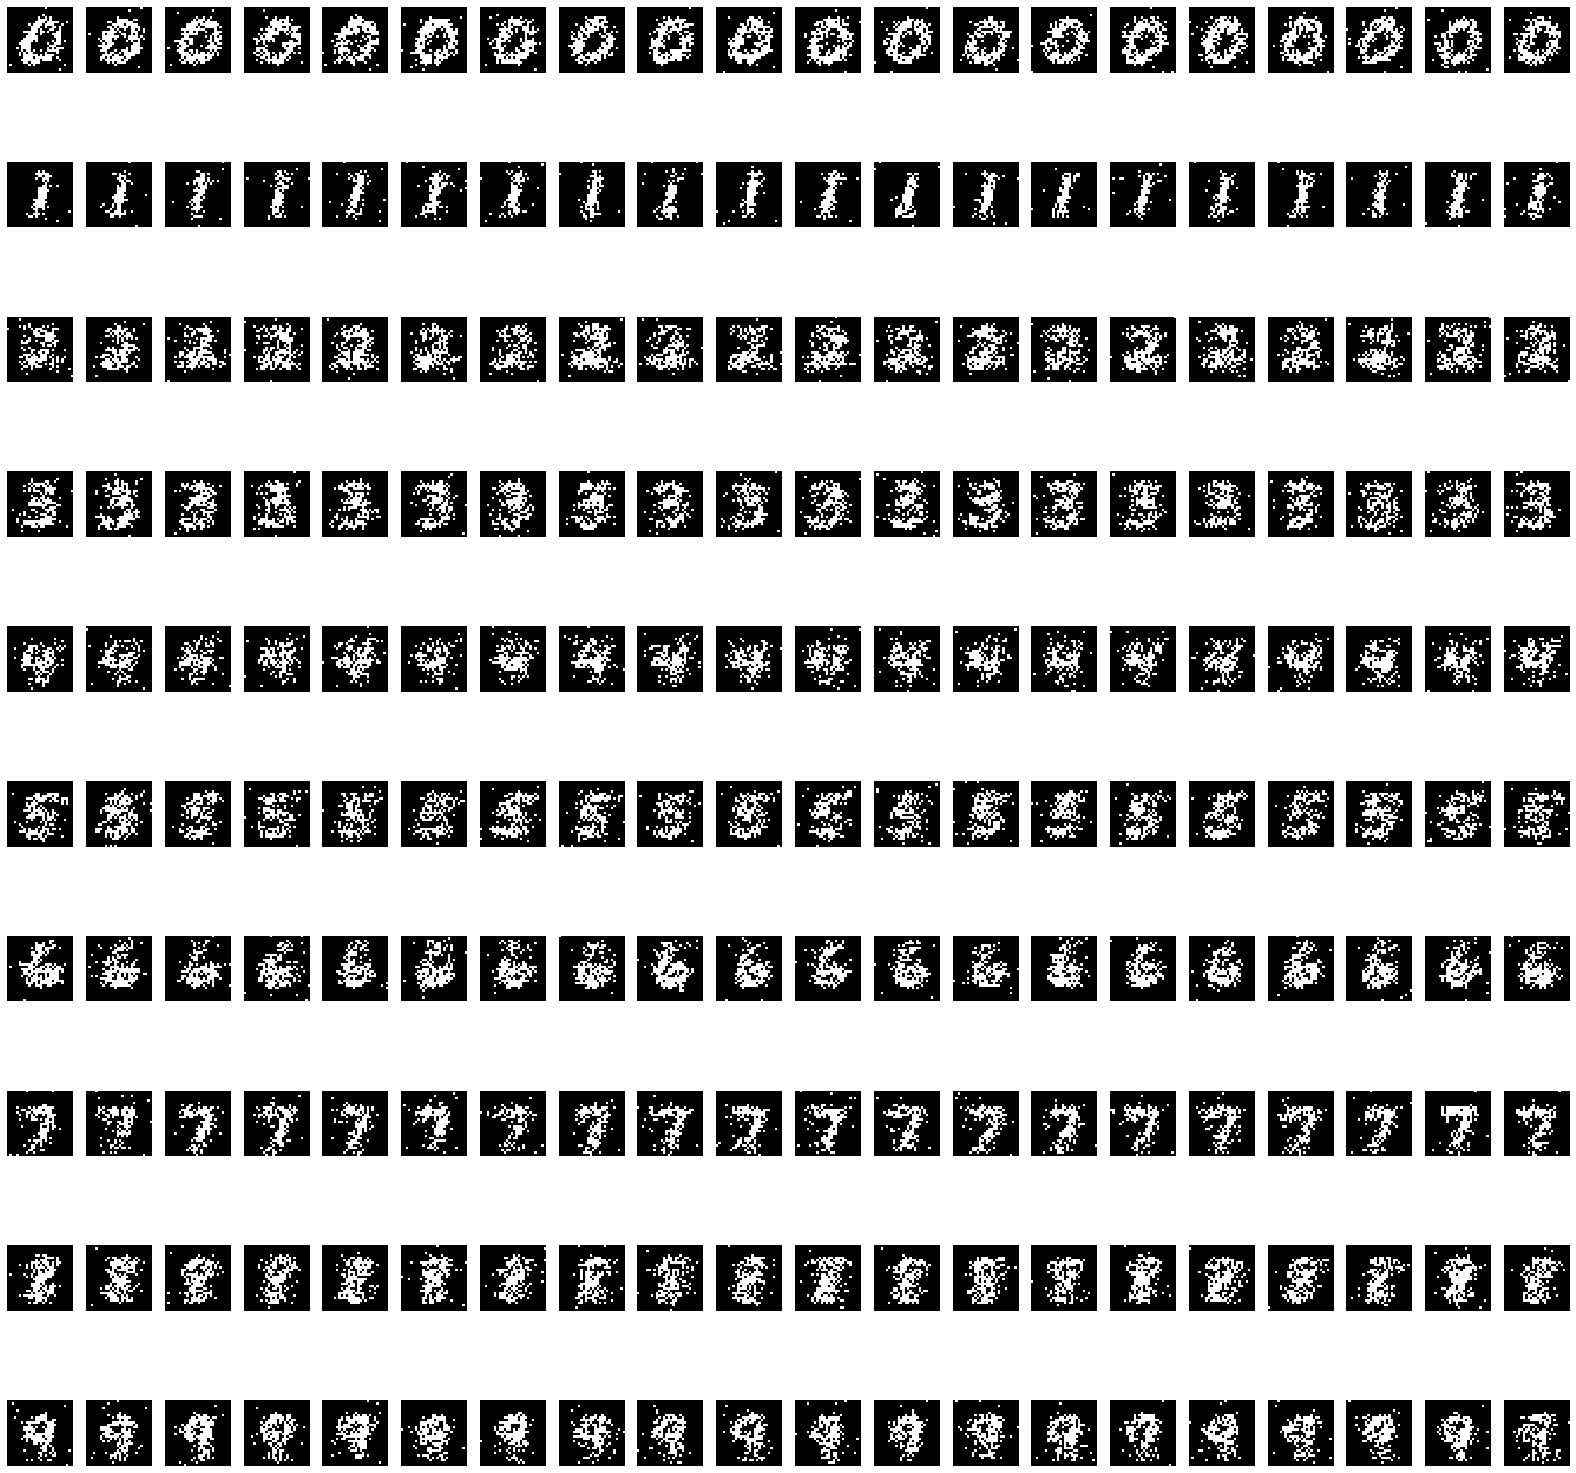

In [78]:
def show_digit(probability, random, ax):
    img = np.zeros(784)
    img[random < probability] = 1.0
    plot_arr(ax, img)
    
    
def P10(num_examples):
    bnb = BernoulliNB(binarize = 0.1)
    bnb.fit(mini_train_data, mini_train_labels)
    prob = np.exp(bnb.feature_log_prob_)
    # rows of prob correspond to digits, columns correspond to pixels
    u01 = np.random.rand(10, num_examples, 784)
    # rows of u01 correspond to digits, columns correspond to examples, stacks correspond to pixels
    # u01 = np.ones((10, num_examples, 784))/2 # alternate experiment: remove randomness
    fig, ax = plt.subplots(nrows=10, ncols=num_examples, figsize=(28, 28))
    for digit in range(10):
        for ex in range(num_examples):
            show_digit(prob[digit], u01[digit,ex,:], ax[digit,ex])
    
    
P10(20)

ANSWER: The randomly-generated images are fuzzier than the training data, which is what you would expect due to the randomness introduced, but you can still make out the numbers. Using the same fixed number to generate each pixel, say 0.5,  instead of a random number, results in much less fuzzy images. Of course, doing that gives you 20 copies of the same image. Also, there is no grey in any of these images and the training images have grey. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [79]:
def P11(buckets, correct, total):
    bnb = BernoulliNB(alpha = 0.001, binarize = 0)
    bnb.fit(mini_train_data, mini_train_labels)
    pred_probs = np.amax(bnb.predict_proba(dev_data), axis=1)
    bucket_vals = np.digitize(pred_probs, buckets, right=True)
    correct_preds = (bnb.predict(dev_data) == dev_labels)
    for (bucket, corr_pred) in zip(bucket_vals, correct_preds):
        total[bucket] += 1
        if (corr_pred):
            correct[bucket] += 1


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

accs = []

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    accs.append(accuracy)
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))
    
print()
print('correlation of probability bucket and accuracy:', np.corrcoef(buckets, accs)[0,1])

print('p(pred) > 0.9 accuracy', sum(correct[2:])/sum(total[2:]))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938

correlation of probability bucket and accuracy: 0.8018307142152569
p(pred) > 0.9 accuracy 0.8379772961816305


ANSWER: I think it's nearly calibrated. The accuracy when the predicted probability is at least 0.9 is 83%, which is less than 90% but not too far. The accuracy is increasing as the probability values in the bins increase. Also, the correlation of the probability bucket with the accuracy of the bucket is over 0.80, which indicates a fairly strong positive relationship. The correlation is not higher because this is a non-linear relationship.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [80]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()